<a href="https://colab.research.google.com/github/Tmasterflex1/uber-data-analysis/blob/main/uber_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use Python to:

Check how long do people travel with Uber?

What Hour Do Most People Take Uber To Their Destination?

Check The Purpose Of Trips

Which Day Has The Highest Number Of Trips

What Are The Number Of Trips Per Each Day?

What Are The Trips In The Month

The starting points of trips. Where Do People Start Boarding Their Trip From Most?

**Import libraries needed**

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

**Import the data from a git repo using raw data link**

In [5]:
data=pd.read_csv('https://raw.githubusercontent.com/Tmasterflex1/data-files/main/uberdrives.csv')
data.head() #Shows the top of csv file

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Find missing values**

In [7]:
data.isnull().any()
#find any with missing value

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [9]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Drop the NaN values then double checking



In [10]:
data=data.dropna()

In [11]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [12]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

Graps the hours, DAY, day of week, month and weekday

In [13]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [14]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


**Catagories**

In [15]:
data['CATEGORY*'].value_counts()
#prints what categories were used

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

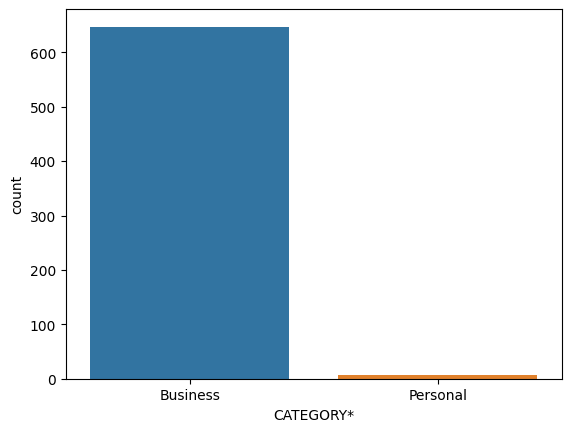

In [17]:
sns.countplot(x='CATEGORY*',data=data)

**How long do people travel with uber?**

<Axes: ylabel='Frequency'>

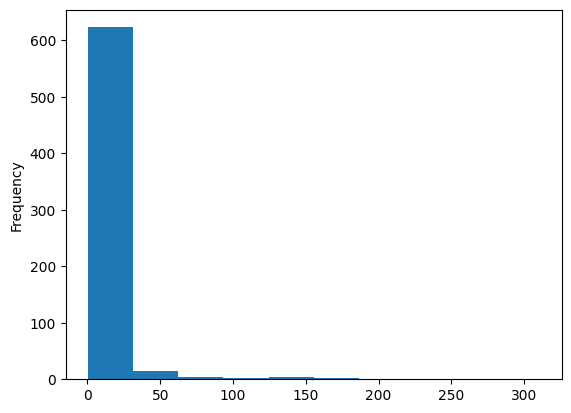

In [18]:
data['MILES*'].plot.hist()

**What hour do most people take uber to their destination?**

Text(0.5, 1.0, 'Number of Trips Vs hours')

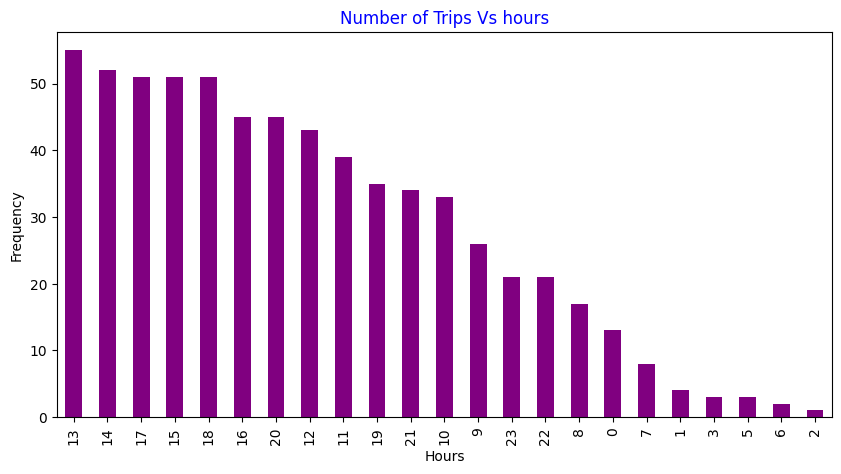

In [23]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='purple',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs hours',color='blue')

**purpose of trips**

<Axes: >

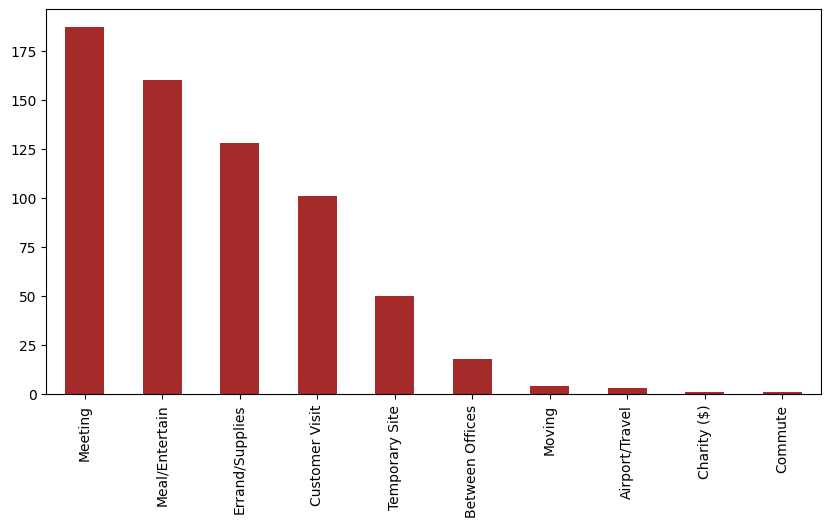

In [26]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

**which day has the highest number of trips**

<Axes: >

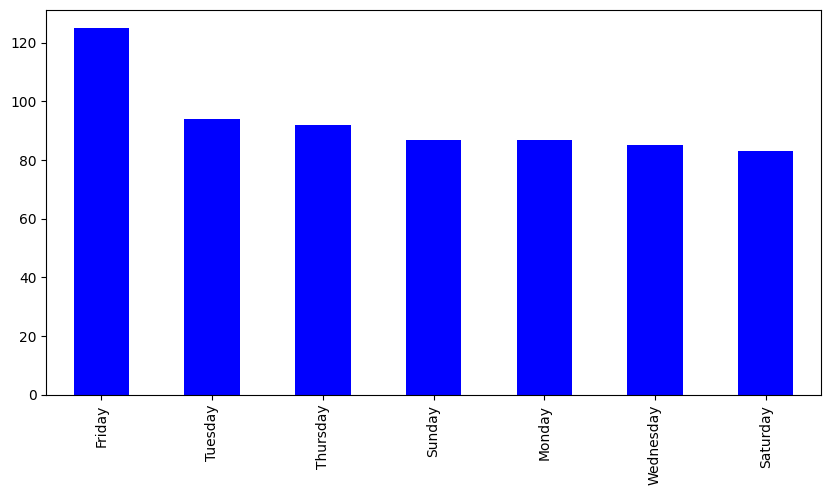

In [27]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

**What Are The Number Of Trips Per Each Day?**

<Axes: >

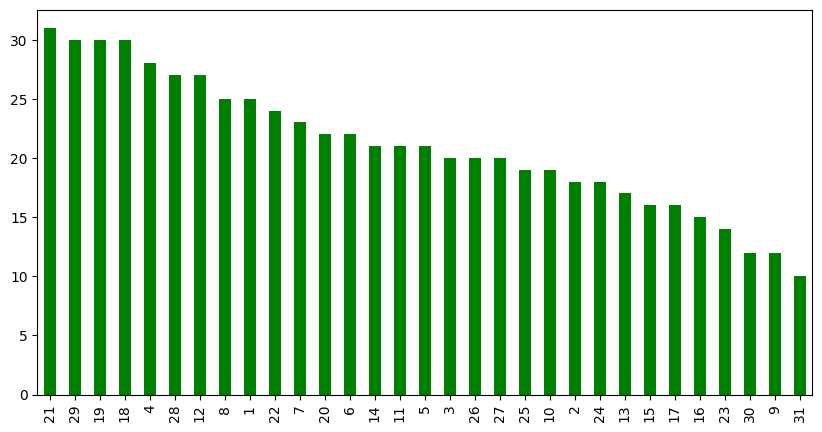

In [28]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

**What month has the most trips**

<Axes: >

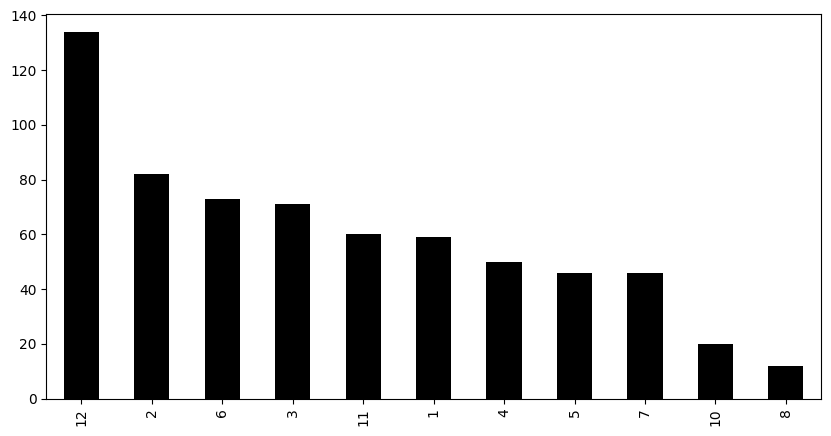

In [29]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

**Starting point of trips where they board**

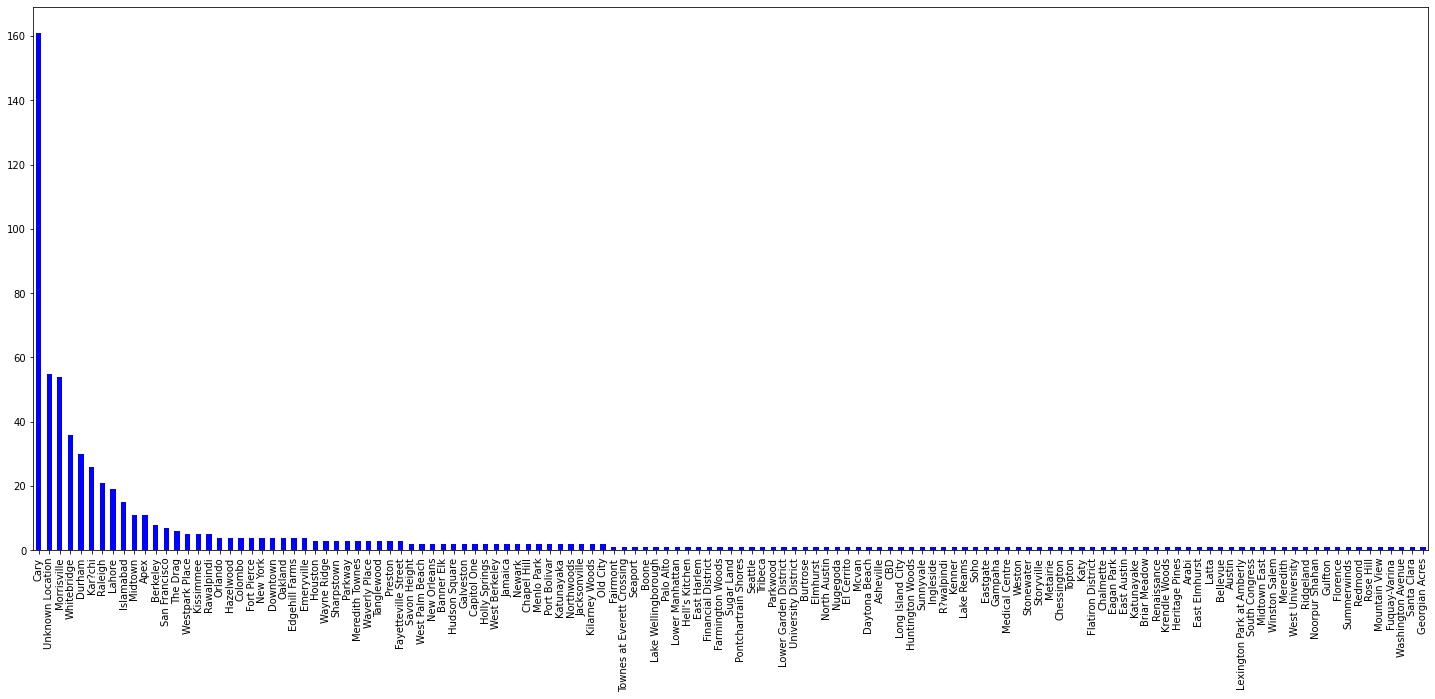

In [ ]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

top 5 starting points

In [31]:
data['START*'].value_counts().head(5)

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Name: START*, dtype: int64